# Reinforcement Learning
Još se zove i učenje uslovljavanjem. To je vrsta mašinskog učenja kod koje agent uči kako da radi akcije u nekom okruženju. 

Agent konstantno uči iz interakcija sa okruženjem koje rezultuju nagradama (pozitvna nagrada) ili kaznama (negativna nagrada).

Nagrada koju dobije agent govori koliko je bila dobra/loša akcija koju je agent izabrao.

Cilj je da agent bira akcije tako da maksimizuje ocekivanu kumulativnu nagradu koju dobija od okruženja.

## Proces obučavanja
<div style="text-align:center">
<img src="imgs/rl.png" width="40%"/>
</div>

Agent u stanju $s$ radi akciju $a$ (bira akciju iz skupa akcija $a \in A$) u nekom okruženju. Nakon izvršene akcije, okruženje vraća: sledeće stanje $s_{t+1}$ u koje agent prelazi i nagradu $r_t$.

Npr. u igrici Pac-Man, agent moze da radi neku akciju da se pomeri dole, gore, levo, desno i da pojede hranu. Ako uradi dobru akciju i pojede hranu, dobiće pozitivnu nagradu, ali ako uradi lošu akciju tako da ga protivnik pojede, dobiće negativnu nagradu.


## Epizoda
Epizoda je niz stanja, akcija i nagrada. Sve iteracije od početnog stanja do poslednjeg (terminalnog) stanja.

Npr. U Pac-Man igrici epizoda pocinje kada pokrenete Pac-Mana, a završava se kada Pac-Man pređe na sledeći nivo ili pogine.


## Frozen Lake
Mi cemo resaviti igricu [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

Koriscticemo bibliteku gymnasium koja sadrži različita okruženja. Kod kuće možete probati da iskoristite druga okruženja. Okruženja su podeljena u različite klase, a mi ćemo rešavati najjednostavnija okruženja koja se nalaze u klasi [Toy Text](https://gymnasium.farama.org/environments/toy_text/). Iz ove klase rešićemo *Frozen Lake* okruženje.

Pravila igre:
- Cilj je da naučimo agenta da skupi poklon.
- Nagradu dobijamo kada skupimo poklon. U svakom drugom slučaju ne dobijamo nagradu, tj. nagrada je 0.
- Akcije koje možemo da radimo:
    - 0: levo
    - 1: dole
    - 2: desno
    - 3: gore
- Ukupno ima 16 stanja (polja).
- Početno stanje je na poziciji [0,0] odnosno gore levo.

Za više detalja pogledajte [dokumentaciju](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).


<div style="text-align:center">
<img src="imgs/frozen_lake_solved.gif" style="text-align:center" width="30%"/>
</div>

*Da biste uspešno pokrenuli notebook trebaju vam biblioteke: numpy, matplotlib, gymnasium i gymnasium[toy text]. Instalirajte ih ručno ili izvršite `pip install -r requirements.txt` u konzoli, kako biste instalirali neophodne biblioteke.*

Importujemo neophodne biblioteke i pravimo funkciju `render_state()` za iscrtavanje kako bismo lakše vizualizovali svako stanje.

stanje:0


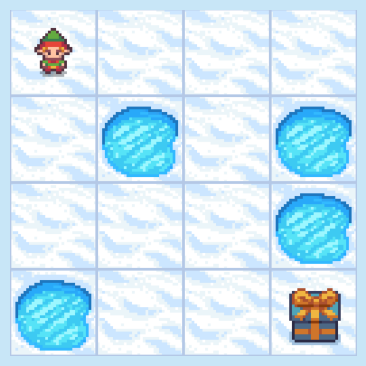

In [129]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from os import environ
from time import sleep
from IPython.display import clear_output
environ["SDL_VIDEODRIVER"] = "dummy" 

# pravimo okruženje
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='rgb_array')    
# env.reset() vraca 2 stvari:  1.stanje i 2. info. Info vrednost nam ne treba
state, _ = env.reset(seed=42) 
print(f'stanje:{state}')

# funkcija koja prikzuje trenutno stanje
def render_state(size='normal'):
    figsize=(2.5,2.5) if size=='small' else (4.5,4.5)
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.gcf().set_facecolor("#c8e6f7")
    plt.imshow(env.render())
    plt.show()
    
render_state()

Skup akcija koje agent može da uradi zove se *action space* ($a \in A$). U konkretnom okruženju, agent može da uradi 4 akcija: levo, dole, desno, gore.

Skup stanja u kojima se agent može naći zove se *observation space* ($s \in S$). U konkretnom okruženju, agent se može naći u 16 različitih stanja.

### *Observation vs State*

Napomena: postoje dva jako slična pojma: stanje $s$ i opservacija $o$. Ova dva pojma su jako slična ali nisu ista, nisu sinonimi. Opservacija je podskup informacija iz nekog stanja. Mi ćemo u konkretnom slučaju posmatrati opservaciju i stanje kao iste pojmove.

In [130]:
print(env.action_space) # 4 akcije - levo, dole, desno, gore
print(env.observation_space) # 16 pozicija na tabli

Discrete(4)
Discrete(16)


Da bismo izabrali neku akciju možemo ručno da izaberemo neki broj, ili random da izaberemo neku akciju. To možemo da uradi programski pozivajući funkciju `sample()` ili pozivom `np.random.choice(n_actions)`.

In [131]:
action = env.action_space.sample()
print(action)

3


### Upoznavanje sa *Frozen Lake* okruženjem

Uradićemo sad akciju i pomeriti se iz trenutnog stanja u sledeće stanje. Uradićemo akciju 1, odnosno akciju 'dole'.

Zatim ćemo uraditi drugu akciju 2, odnosno akciju 'desno' kako bismo upali u rupu na jezeru i završili epizodu.

pocetno stanje


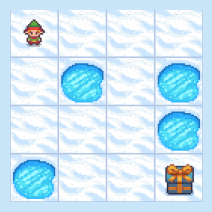

akcija: dole


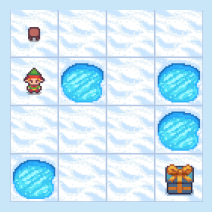

akcija: desno


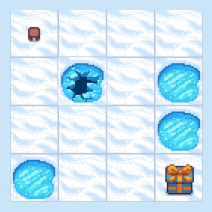

In [132]:
env.reset(seed=42) # resetuj da krenes od pocetka
print('pocetno stanje')
render_state(size='small') # prikazi stanje

# prva akcija - uradi akciju 1, odnosno dole
env.step(action=1) 
print('akcija: dole')
render_state(size='small') 

# druga akcija - uradi akciju 2, odnosno desno
# primetimo da ce posle ove akcije agent zavrsiti u rupi
# tako stigli smo do kraja epizode (terminalno stanje)
env.step(action=2)
print('akcija: desno')
render_state(size='small') # prikazi stanje

Nakon sto smo došli do kraja epizode, kakvu god akciju da uradimo neće imati efekta, jer smo stigli do kraja epizode, odnosno terminalnog stanja.

akcija: bilo koja akcija


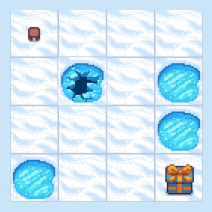

In [133]:
env.step(action=2) 
print('akcija: bilo koja akcija')
render_state(size='small')

Da se podsetimo kako ide proces obučavanja:
<div style="text-align:center">
<img src="imgs/rl.png" width="30%"/>
</div>

U konkretnom slučaju akcije ćemo birati random. Pišemo kod za ovaj proces.

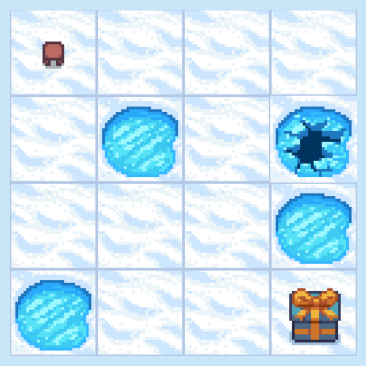

In [134]:
from IPython.display import clear_output # kako bismo vizualizovali u jednoj ćeliji
state, _ = env.reset(seed=42)
done = False
render_state()
while not done:
    action = env.action_space.sample() # izaberi random akciju
    next_state, _, done, _, _ = env.step(action)
    state = next_state
    sleep(0.2)
    clear_output(True)
    render_state()

Analiziramo ovu liniju koda: `next_state, _, done, _, _ = env.step(action)`. 

Agent izvršava neku akciju u okruženju pozivom `step()` metode. Okruženje vraća sledeće stanje `next_state` i informaciju da li je epizoda završena `done`. Primetimo na slici iznad (proces obučavanja) da okruženje treba da vrati i nagradu. Hajde da posmatramo nagrade sad. Sačuvaćemo nagradu koju nam vrati okruženje u svakom koraku $t$. Primetimo da će nagrada biti 0 za svaki korak, osim kada pokupimo poklon, tada dobijamo nagradu 1.

Nagradu posle svake akcije sačuvacemo u listi `rewards` i pustimo agenta da se kreće random. Nakon završene epizode ispisujemo nagrade dobijene posle svake akcije.

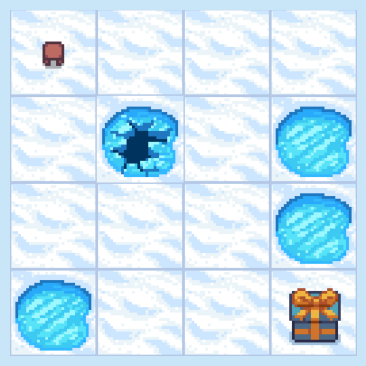

[0.0, 0.0, 0.0, 0.0]


In [135]:
from IPython.display import clear_output
state, _ = env.reset(seed=42)
done = False
rewards = []
render_state()
while not done:
    action = env.action_space.sample()
    next_state, reward, done, _, _ = env.step(action)
    state = next_state
    rewards.append(reward)
    
    sleep(0.2)
    clear_output(True)
    render_state()

print(rewards)

Želimo da agenta nešto naučimo, a ne da se kreće random po jezeru. Naučićemo ga da pokupi poklon uz pomoć algoritma Q-learning.

## Q-learning
Q-learning je samo jedan od mnogo algoritama iz Reinforcement Learning oblasti.

Pravimo Q-tabelu (još se zove Q-matrica). Q-tabela odgovara na pitanje koliko vredi svaka akcija u svakom stanju. Q-tabela će znati koja su stanja dobra, a koja stanja su loša po nas.

Q-vrednosti su vrednosti iz matrice. Odgovara na pitanje: koliko vredi akcija $a$ u stanju $s$.

U našem primeru imamo 16 stanja (pozicija), a iz svake pozicije možemo da izvršimo 4 akcije: levo, dole, desno, gore. Želimo da u svakom stanju znamo koliko vredi svaka akcija, s toga pravimo matricu dimenzija 16 x 4.
Očekujemo da će rupe u ledu imati manje Q-vrednosti, a polja bliže poklonu veću Q-vrednost.


<table>
  <tr>
    <th colspan=2 rowspan=2></th>
    <th colspan=4 style='background-color: salmon'>Akcije</th>
  </tr>
  <tr>
    <th>Levo</th> <th>Dole</th> <th>Desno</th> <th>Gore</th>
  </tr>

  <tr>
    <th rowspan=5 style='background-color: salmon'>Stanja</th>
    <th>stanje 0</th>
    <td>0</td> <td>0</td> <td>0</td> <td>0</td>
  </tr>
  <tr>
    <th>stanje 1</th>
    <td>0</td> <td>0</td> <td>0</td> <td>0</td>
  </tr>
  <tr>
    <th>stanje 2</th>
    <td>0</td> <td>0</td> <td>0</td> <td>0</td>
  </tr>
  <tr>
    <th>...</th>
    <td>...</td> <td>...</td> <td>...</td> <td>...</td>
  </tr>
  <tr>
    <th>stanje 15</th>
    <td>0</td> <td>0</td> <td>0</td> <td>0</td>
  </tr>
</table>


In [136]:
n_states = env.observation_space.n
n_actions = env.action_space.n
qtable = np.zeros([n_states, n_actions]) # 16 x 4
print(qtable)
print(qtable.shape)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(16, 4)


In [137]:
# da se podsetimo kako izgleda petlja za random ponašanje agenta (bez isrtavanja stanja)
state, _ = env.reset(seed=42)
done = False
rewards = []
while not done:
    action = env.action_space.sample() # random izbor akcije
    next_state, reward, done, _, _ = env.step(action)
    state = next_state
    rewards.append(reward)
print(rewards)

[0.0, 0.0, 0.0]


### Kako se popunjava Q-tabela? 
Pustimo agenta da se idalje kreće random po okruženju, i da istražuje. Za to vreme će agent naučiti koje akcije su dobre, a koje loše, tako što će dobiti pozitivnu ili negativnu nagradu. Kada agent dobije bilo kakvu nagrada, upisaće neku vrednost u Q-tabelu. Koju vrednost upisuje, zavisi od toga koliku nagradu dobije.

Da bismo popunili Q-tabelu koristićemo Q-learning formulu i ona je definisana:


$$Q(s,a) = Q(s,a) + \alpha (R + \gamma \max Q (s', a') - Q(s,a)) $$

- $s$ je trenutno stanje.
- $a$ je trenutna akcija.
- $Q(s,a)$ je trenutna estimirana Q-vrednost za stanje $s$ i akciju $a$. Ovo je vrednost koju čitamo iz Q-tabele.
- $\alpha$ je *learning rate*, odnosno brzina učenja. Govori koliko ćemo pregaziti prethodnu vrednost. (Biće u kasnijim lekcijama detaljnije objašnjeno).
- $R$ je skraćeno od *Reward*, odnosno nagrada za trenutni par (stanje, akcija).
- $\gamma$ je zanemarivanje, *discounting factor*. Ideja je da su daleke nagrade manje važne.
- $\max Q (s', a')$ je najbolja (maksimalna) estimirana Q-vrednost od svih akcija u sledećem stanju.

Q-formulu ćemo pozivati posle svakog koraka, tj. svaki put u while petlji.

Sad ćemo da pogledamo jedan korak u epizodi, tj. jedan prelaz iz stanja $s_{t}$ u sledeće stanje $s_{t+1}$. U svakom koraku ćemo da popunimo Q-tabelu.

In [138]:
state, _ = env.reset(seed=42)
action = 1 # neki random broj
alpha = 0.1
gamma = 0.9
next_state, reward, done, _, _ = env.step(action)

# q-learning formula
qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Zasto se je nepromenja Q-tabela? Zasto su idalje sve nule?

Q-tabela je nepromenjna jer je nagrada $R$ nula i $\max Q (s', a')$ je nula pa ce u formuli sve vrednosti biti nula.

Q-tabela ce se promeniti onda kada dobijemo prvu nagradu.

Sada cemo vestacki ubaciti nagradu koja je razlicita od 0 da bismo videli rezultat Q-formule.

*Mozemo vise puta pokrenuti sledecu celiju da vidimo kako se Q-tabela polako menja i kako se menja vremenom Q-vrednost za jednu akciju.*

In [139]:
reward = 1
action = 1
qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])
print(qtable)

[[0.  0.1 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


Sada resetujemo Q-tabelu i pišemo kod za jednu epizodu.

In [140]:
qtable = np.zeros([n_states, n_actions]) # 16 x 4
state, _ = env.reset(seed=42)
# hyperparameters
alpha = 0.1
gamma = 0.9

done = False
while not done:
    action = env.action_space.sample()    
    next_state, reward, done, _, _ = env.step(action)
    # q-learning formula
    qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])
    state = next_state # ova linija koda ide obavezno nakon sto pozovemo q-learning formulu

print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Vidimo da u jednoj epizodi ne možemo mnogo da naučimo, pa ćemo da pustimo agenta da igra više epizoda.

In [141]:
qtable = np.zeros([n_states, n_actions]) # 16 x 4
rewards = []
# hyperparameters
alpha = 0.1
gamma = 0.9
n_episodes=300

for episode in range(n_episodes):
    state, _ = env.reset(seed=42)
    done = False
    while not done:
        action = env.action_space.sample()
        next_state, reward, done, _, _ = env.step(action)
        # q-learning formula
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])
        state = next_state # ova linija koda ide obavezno nakon što pozovemo q-learning formulu
        rewards.append(reward)

print(np.round(qtable, 2))

[[0.01 0.01 0.02 0.01]
 [0.01 0.   0.02 0.01]
 [0.01 0.04 0.   0.01]
 [0.   0.   0.   0.  ]
 [0.01 0.02 0.   0.01]
 [0.   0.   0.   0.  ]
 [0.   0.06 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.01 0.   0.03 0.01]
 [0.01 0.03 0.05 0.  ]
 [0.   0.13 0.   0.02]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.01 0.1  0.  ]
 [0.01 0.01 0.47 0.01]
 [0.   0.   0.   0.  ]]


Možemo da vizualizujemo ove vrednosti iz Q-tabele da vidimo koliko svaka akcija za svako polje vredi.

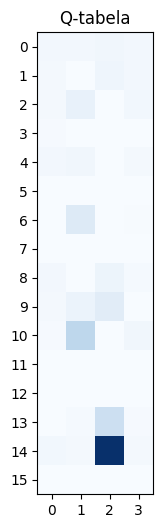

In [142]:
plt.figure(figsize=(6,6))
plt.xticks([0,1,2,3])
plt.yticks(np.arange(16))
plt.title('Q-tabela')
plt.imshow(qtable, cmap=plt.cm.Blues);

Ovde mozete videti animaciju kako se popunjava Q-tabela kroz 700 epizoda.

<div style="text-align:center">
<img src="imgs/qtable_updating.gif" style="text-align:center" width="30%"/>
</div>


Dodajemo sada Q-vrednosti kada prikazujemo Q-tabelu. 

Kod postaje komplikovaniji, ali upakovaćemo kod u funkciju kako bismo mogli da pozovemo iznova. *Ne zamaramo se funkcijom za iscrtavanje.*

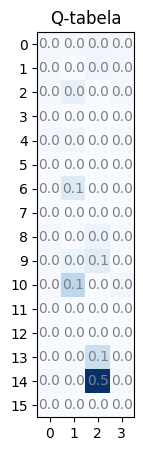

In [143]:
def visualize_matrix(matrix: np.ndarray, name=''):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(name)
    plt.yticks(np.arange(matrix.shape[0]))
    plt.xticks(np.arange(matrix.shape[1]))
    ax.imshow(matrix, cmap=plt.cm.Blues)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, np.round(matrix[i, j],1), ha="center", va="center", color="grey")

visualize_matrix(qtable, name='Q-tabela')

### V-tabela
Podsetimo se, Q-tabela odgovara na pitanje koliko vredi svaka akcija.
Pored Q-tabele postoji i V-tabela, odnosno tabela vrednosti. 

V-tabela odgovara na pitanje koliko vredi svako stanje. Stanje vredi koliko i njegova najbolja akcija.

Uporedimo sliku Q-tabele i V-tabele.

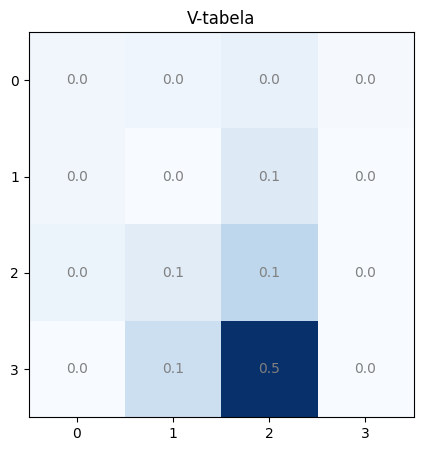

In [144]:
v_table = np.max(qtable, axis=1).reshape((4,4))
visualize_matrix(v_table, name='V-tabela')

Uporedimo sliku V-tabele i sliku zaleđenog jezera. 
Vidimo da je agent dobro naučio da polja sa rupama u jezeru vrede malo, odnosno 0. Vidimo da kako se priblizavamo poklonu, da tako vrednosti polja rastu. Vidimo da polje koje nas dovodi do poklona ima najveću vrednost, odnosno najvrednije je.

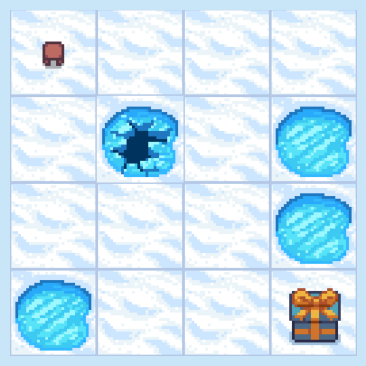

In [145]:
render_state()

Kao sto vidimo, Q-tabela se menja sa vremenom, ali sporo. To je zato što nas nagrada čeka samo na kraju, a **agent se kreće random**. Možemo da proces učenja ubrzamo tako što će se agent pomerati pametnije, a ne samo random.
Ne želimo da se agent kreće random već želimo da agent u početku istraži prostor. Nakon što istraži prostor, onda to agentovo znanje želimo da iskoristimo.

Ideja je da agent sa nekom verovatnoćom izabere random akciju. U svakom drugom slučaju će izabrati najbolju akciju, tj. akciju koja ima najveću Q-vrednost.

### Exploration Exploitation trade-off

- Istraživanje - radi akcije koje do sada nismo probali (bar ne mnogo puta)
- Iskorišćavanje - radi dobro poznate akcije koje donose nagradu (one sa velikim Q-vrednostima)

Uvodimo novi parametera $\epsilon$. Epsilon je verovatnoca da ćemo istraživati, a ne iskorišćavati.

Za pocetak ćemo staviti da je $\epsilon=0.6$ konstanta i 60% cemo istrazivati, a 40% cemo iskoriscavati.

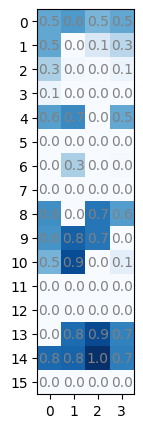

In [146]:
qtable = np.zeros([n_states, n_actions]) # 16 x 4
rewards = []
np.random.seed(42)
# hyperparameters
alpha = 0.1
gamma = 0.9
epsilon=0.6
n_episodes=1000

for episode in range(n_episodes):
    state, _ = env.reset(seed=42)
    done = False
    while not done:
        # prvo biramo akciju - 60% exploration, 40% exploitation
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Exploration
        else:
            action = np.argmax(qtable[state, :]) # Exploitation
        
        next_state, reward, done, _, _ = env.step(action)
        # q-learning formula
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])
        state = next_state # ova linija koda ide obavezno nakon sto pozovemo q-learning formulu
        rewards.append(reward)

visualize_matrix(qtable)

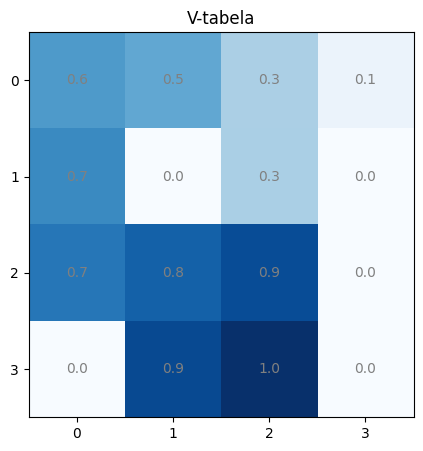

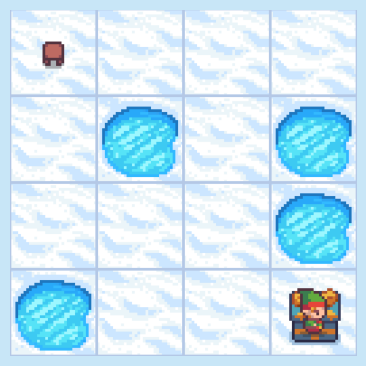

In [147]:
# koliko vredi svako stanje
v_table = np.max(qtable, axis=1).reshape((4,4))
visualize_matrix(v_table, name='V-tabela')
render_state()

Q-learning spada u grupu pohlepnih (*greedy*) algoritama, zato što pohlepno uzimamo polja sa najboljim nagradama u svakoj epizodi. Još se zove i  $\epsilon$-*greedy*, jer od parametra $\epsilon$ zavisi koliko je agent pohlepan.

Vaš zadatak je da enkapsulirate kod u klasu (imate već dat kostur u fajlu *reinforcement learning.py*), zatim da re[ite zadatke navedene ispod.

In [148]:
class Q_Agent():
    def __init__(self, env: gym.Env, alpha:int, gamma:int, epsilon:int, n_episodes:int, seed:int=42):
        pass

    def learn(self) -> np.ndarray:
        '''Returns a list of rewards from training.'''
        pass

    def predict(self, state: np.ndarray) -> int:
        '''Returns the policy action from a state.'''
        pass
    
    def n_actions(self) -> int:
        '''Returns number of actions.'''
        pass

    def n_states(self) -> int:
        '''Returns number of states.'''
        pass

## Zadaci
1. Implementirati `Q_Agent` klasu do kraja.
1. Dodati metodu `get_v_table(self)` koja vraća V-tabelu u odgovarajućem obliku. 
1. Dodati metodu `test_agent(self, n_episodes)`koja evaluira performanse agenta u $n$ epizoda (definisano parametrom funkcije). Metoda vraca 1. prosecan broj koraka u epizodi i 2. prosecnu nagradu u epizodi `(avg_n_steps, avg_reward)`. U metodi pozvati self.predict() za dobavljanje akcije.

### Dodatni zadaci
1. U metodi `test_agent(self, n_episodes)` koristiti samo iskorišćavanje kod izbora akcija, bez istraživanja. Porazmisli šta se desava sa parametrom `gamma`.
1. Pre poziva `test_agent(self, n_episodes)` metode, promeni env atribut klase da bude = `gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='human')`. Promenom atributa `render_mode='human'`, kada pokrenes python fajl možeš da vizualizuješ kretanje agenta u svakoj epizodi.
1. Probati druge hiperparametre i naći bolje vrednosti tako da se proces učenja ubrza.
1. Implementirati kaznu za agenta kada stane na polje sa rupom u jezeru tako da se proces učenja ubrza.
1. Probaj da povećaš tablu sa 4x4 na 6x6 da iznova obučiš agenta (U dokumentaciji piše kako se menja tabela).
